# Basics of  Pandas

<img src="../Images/pandas.png" width="300"> 

Pandas is one of the mostly used libraries in Python for data cleaning, wrangling and analysis. It has a wide range of tools to deal with almost all data types and forms together with statistical and even visualization tools.
Due to large number of tools within Pandas library we're only going to see the most important parts of them together but I highly suggest the book [Python for Data Analysis](https://www.oreilly.com/library/view/python-for-data/9781491957653/) written by creator of the Pandas library [Wes McKinney](https://wesmckinney.com/). Here also you can find some good resources for Pandas: [link](https://www.dataschool.io/best-python-pandas-resources/) and of course don't forget to watch Mark Ham [YouTube Series](https://www.youtube.com/watch?v=yzIMircGU5I&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=2&t=232s)

Let's start discovering pandas tools working with a real dataset. 
I've already downloaded a [dataset](https://archive.ics.uci.edu/ml/datasets/Census+Income) containing US census data for year 1996.
You can find more information about this dataset and how it's been collected in the following path: 

*Intro_to_Python/Files/data/census/description.txt*

## Reading a csv file

The first thing we do is to read the csv file:

In [4]:
import pandas as pd

df = pd.read_csv('../Data/adult.csv')

<img src="../Images/owl.svg"   width="40" align="left">    

***What happened in the cell above?***

**line1** : importing pandas library and giving an alias name(pd) to it

line2 : Nothing :D

**line3** : In order to read our dataset into the memory, we should use a function called **read_csv**.

why we put a "pd." before it? because we didn't import this function explicitly so we need to tell Python where can it find the **read_csv** function. Then we passed the file path as the argument. Notice that the file path is not the only argument you can pass to **read_csv** but for now, we don't need anything else.

Ok now let's take a look at the data we have just read:

In [5]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


<img src="../Images/owl.svg"   width="40" align="left">    

***What happened in the cell above?***

We used a method called *.head( )* in order to see the first 5 rows of our data. Instead of living *head( )* without an argument, we can decide how many rows of the table we want to see *(Why leaving it without an argument we got 5 rows then?)*

As you may have noticed, something doesn't make sense in the result. The first row (showed in bold) should contain column labels but at the moment, it's not like this!
The reason is (and it happens a lot dealing with real data) that the original file we've received as our dataset doesn't have any column name.
Reading the description file I've mentioned before, we can find the column names:

In [6]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
             'marital-status', 'occupation', 'relationship', 'race', 'sex',
             'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
            'income']

Ok, now that we have the names we can use an argument of **read_csv** called **names** to provide the column names:

In [8]:
df = pd.read_csv('../Data/adult.csv', names=col_names)

In [9]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Perfect! it seems we've correctly added the column names to our data. While it wasn't the case this time, it can happen that the data we're dealing with has a large size and it takes time to read it again from the csv file. In this case we can add the column name after reading the raw data using the **columns** attribute:

In [10]:
df.columns = col_names

In [11]:
df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


## Understanding your data

Now that we have loaded our data, we should get some basic info about them to know what are the data that we're dealing with.

What is the data type of our loaded data? is it a list? a dictionary? let's find out:

In [12]:
type(df)

pandas.core.frame.DataFrame

For now, just consider the first and last words: **pandas** and **DataFrame**. It means that the file type of our imported data *df* is **DataFrame** and belongs to **pandas** library. What is **DataFrame**? It is a special file type which is not a part of Python's core data types but instead it is built on top of another Python library called **Numpy**. In a nutshell, a **DataFrame** is rectangular (tabular) data type which consists of rows and columns. these rows and columns have their our data type called **Series** which just like **DataFrame** belongs to **pandas** as is based on the **Numpy** library. The following figure shows their relationships together:

<img src="../Images/dataframe.png" width="800"> 

### Shape of data

**shape** attribute returns the shape of the dataframe : 32561 rows and 15 columns:

In [13]:
df.shape

(32561, 15)

As you may remember the function **len** and how we can use it with *lists* and *strings*. We can use it also with our *DataFrame* to get the number of rows:

In [14]:
len(df)

32561

### Data preview

Just like **head( )** method used to take a peek at the first n rows of DataFrame, we can use **tail( )** method to see the last n rows:

In [15]:
df.tail(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


### Simple descriptive statistics

Using *.info( )* we can get general info of the dataframe:
    

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


<img src="../Images/info.png" width="800"> 

In case we want to have a general idea about our data, we can use **.describe( )** method:

In [17]:
df.describe(include='all').round(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32561.0,32561,32561.0,32561,32561.0,32561,32561,32561,32561,32561,32561.0,32561.0,32561.0,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.6,NaN,189778.4,NaN,10.1,NaN,NaN,NaN,NaN,NaN,1077.6,87.3,40.4,NaN,NaN
std,13.6,NaN,105550.0,NaN,2.6,NaN,NaN,NaN,NaN,NaN,7385.3,403.0,12.3,NaN,NaN
min,17.0,NaN,12285.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,NaN,NaN
25%,28.0,NaN,117827.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,40.0,NaN,NaN
50%,37.0,NaN,178356.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,40.0,NaN,NaN
75%,48.0,NaN,237051.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,45.0,NaN,NaN


In [18]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<img src="../Images/owl.svg"   width="40" align="left">    

***What happened in the cell above?***

As I just said **describe( )** provides simple statistics but why we've used **include='all'** argument and **.round(1)** method?

- **include** argument by default is None and as a result we'll get the statistics only for the numerical columns
- **round(n)** is a DataFrame method which rounds the values to **n** digits. We've used it to make our result a bit more readable.

## Essential functionalities

### Slicing and filtering data

Often we want to perform a task on one single column or use it as an input for another function. Two of the easiest ways to get a single column from a dataframe are:

     df[column_name]
     df.column_name

<img src="../Images/student.svg"   width="30" align="left">               

**YOUR TURN**

try to get the **capital-loss** column using both methods and explain the results.

In [19]:
(\   .-.   .-.   .-.   .-.   .-.   .-.   .-.   .-.   /_")
 \\_//^\\_//^\\_//^\\_//^\\_//^\\_//^\\_//^\\_//^\\_//
  `"`   `"`   `"`   `"`   `"`   `"`   `"`   `"`   `"`

SyntaxError: unexpected character after line continuation character (204823071.py, line 1)

Using **describe( )** method we saw that for the categorical columns we'll get the most frequent value but how can we have the frequency of all unique values of a column (similar to COUNT DISTINCT in SQL)? 

To do so we can apply **value_counts( )** method to a categorical column. for example let's see value counts in the **marital-status** column:

In [20]:
df['marital-status'].value_counts()

marital-status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64

Adding **normalize=True** argument to **value_counts( )** method we can have the frequencies in percentage:

In [21]:
df['marital-status'].value_counts(normalize=True)

marital-status
 Married-civ-spouse       0.459937
 Never-married            0.328092
 Divorced                 0.136452
 Separated                0.031479
 Widowed                  0.030497
 Married-spouse-absent    0.012837
 Married-AF-spouse        0.000706
Name: proportion, dtype: float64

While using the above method will show us the unique values of a column, we can't directly use **.value_counts( )** method to have a list of unique values. (imagine that you want to use these values in a for loop). 
**Series** has another method called **unique( )** which returns a numpy array (not a list):

In [22]:
df['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

Often we want to slice our dataframe and somehow reduce it. We can do it either by slicing or filtering it.

Let's start from slicing. Suppose we want a subset of the original data which contains the first 8 rows and all the columns except the last one:

In [23]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [24]:
df.iloc[1:4,3:4]

,education
1,Bachelors
2,HS-grad
3,11th


<img src="../Images/owl.svg"   width="40" align="left">    

***What happened in the cell above?***

We used one of DataFrame methods called **iloc[ ]** which is for **locating based on index**. Let's see the structure of a **.iloc[ ]** method:

<img src="../Images/iloc.png" width="600"> 

Now let's see how can we filter our data.

Suppose that you want to filter the data to find out people who has a PhD degree and are in a farming/Fishing business:

In [25]:
df[(df.education == ' Doctorate') & (df['occupation'] == ' Farming-fishing')]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
19861,77,Self-emp-inc,84979,Doctorate,16,Married-civ-spouse,Farming-fishing,Husband,White,Male,20051,0,40,United-States,>50K


<img src="../Images/owl.svg"   width="40" align="left">    

***What happened in the cell above?***

The general form of the code we used is : **df \[some_condition \]**

But why does it work? let's take a look at what we've called **some_condition**:

In [26]:
val = (df.education == ' Doctorate') & (df['occupation'] == ' Farming-fishing')

In [27]:
print(f'There are {len(val)} values')
print(f'The type is {type(val)}')
print('\nThe values are:\n')
print(val.value_counts())

There are 32561 values
The type is <class 'pandas.core.series.Series'>

The values are:

False    32560
True         1
Name: count, dtype: int64


By running the previous cell we can understand that what we've called **some_condition** is a **Series** with length of 32,561 (= len(df)) and with 32,560 *False* and just one *True*: This condition is instructing the *df* by telling him which rows it should return (*True*) and which rows shouldn't return (*False*)

In the same way you can also filter single columns (**Series**). imagine you want to filter age column for records with more than 18 years old:

In [28]:
df.age[df.age > 18]

0        39
1        50
2        38
3        53
4        28
         ..
32556    27
32557    40
32558    58
32559    22
32560    52
Name: age, Length: 31616, dtype: int64

<img src="../Images/student.svg"   width="30" align="left">               

**YOUR TURN:**

create two separate dataframe one containing info of women and one for men, compare the percentage of *education* fields in these two dataframes.

In [ ]:
(\   .-.   .-.   .-.   .-.   .-.   .-.   .-.   .-.   /_")
 \\_//^\\_//^\\_//^\\_//^\\_//^\\_//^\\_//^\\_//^\\_//
  `"`   `"`   `"`   `"`   `"`   `"`   `"`   `"`   `"`

In the previous example, we've used two conditions**(df.education == ' Doctorate')** and  **(df\['occupation'\] == ' Farming-fishing')** and have used a logical operator **'&'** to connect them together. But what if instead of just filtering education to be equal to *'Doctorate'* we want to add *'Assoc-acdm'*, *'Assoc-voc'*, and *'Prof-school'* too?

Of course one way would be to add more conditions to ones we already have, but it's a terrible solution!
In cases like this, similar to what we do in SQL (IN), we can filter a column based on multiple values:

In [29]:
edu = [' Doctorate', ' Assoc-acdm', ' Assoc-voc', ' Prof-school']

df[(df.education.isin(edu)) & (df['occupation'] == ' Farming-fishing')].head(4)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
460,44,Private,116632,Assoc-acdm,12,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,<=50K
604,35,Self-emp-not-inc,194404,Assoc-acdm,12,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
894,42,Self-emp-not-inc,177307,Prof-school,15,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,65,United-States,>50K
2200,65,Private,90377,Assoc-voc,11,Married-civ-spouse,Farming-fishing,Husband,White,Male,6767,0,60,United-States,<=50K


But what if we want to exclude rows based on multiple values? it's really simple! Just add **~** before the condition:

In [30]:
df[~(df.education.isin(edu)) & (df['occupation'] == ' Farming-fishing')].head(4)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
16,25,Self-emp-not-inc,176756,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,35,United-States,<=50K
22,35,Federal-gov,76845,9th,5,Married-civ-spouse,Farming-fishing,Husband,Black,Male,0,0,40,United-States,<=50K
79,31,Local-gov,125927,7th-8th,4,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,<=50K
227,66,Self-emp-not-inc,167687,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,1409,0,50,United-States,<=50K


In the previous example we filtered the fields with the exact words but how can we filter them just with a part of a word? (similar to what we do in SQL with *Like*)

Suppose we want to filter the data for all the records that contain *'marr'* in their **'marital-status'** field:

In [31]:
df[df['marital-status'].str.contains('marr')].head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
12,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K


<img src="../Images/owl.svg"   width="40" align="left">    

***What happened in the cell above?***

Now we know that we're dealing with another case of **df\[some_condition\]** and expect that **some_condition** returns a Series with Boolean values. The only thing that is new here is:

**.str.contains( )**
looking at it carefully we can understand that **.contains( )** is a method of **str**. You may ask why suddenly we need to use **str**, which is a legitimate question! We should use **str**, since **Series**, doesn't have a native method to see if a given string is a part of another string, while **str** data type has this method. That's it!


### Sorting data

Sorting columns is really easy in Python: 

Suppose we want to sort *age* and *fnlwgt* in a Ascending and Descending orders. All we have to do is to use **.sort_values( )** method:

In [32]:
df.sort_values(by=['age', 'fnlwgt'], ascending=[True, False]).head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
23373,17,?,806316,11th,7,Never-married,?,Own-child,White,Female,0,0,20,United-States,<=50K
27167,17,Private,721712,10th,6,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,<=50K
7663,17,?,659273,11th,7,Never-married,?,Own-child,Black,Female,0,0,40,Trinadad&Tobago,<=50K
15350,17,?,634226,10th,6,Never-married,?,Own-child,White,Female,0,0,17,United-States,<=50K
22423,17,Private,566049,10th,6,Never-married,Other-service,Own-child,White,Male,0,0,8,United-States,<=50K


### Exporting data

Often we want to save our dataframe into csv or Excel formats. You can do so by using the following lines:

In [34]:
df.to_csv('../Data/name_i_want.csv', index=False) # csv
df.to_excel('../Data/name_i_want.xlsx', index=False) # Excel

## Data transformation

Sometimes we need to **apply** something (Ex. a lambda function) to a specific column of our dataframe.

Using the following general form we can achieve what we want:

**one_column.apply(a_function)**

As an example suppose that we just realized that due to a data insertion error, **fnlwgt** values had been recorded in a wrong way: all the right most digits are added by mistake and we should remove them before using these numbers for our analysis. First, let's check the data type of this column:

In [35]:
df.fnlwgt.dtype

dtype('int64')

we can see that the values are integer. It means unlike strings, we can't just slice them.

**Q:** What should we do?

**A:** We should first convert these integer values to string, remove the digit on the right and convert it to integer again.
    
**Q:** How can we do this?

**A:** By using a for loop to go through items.

**!!** WRONG! You should NEVER use a for loop for such a task!

As we've mentioned above, Series come with a handy method called apply which allows us to apply a function to a Series:

In [36]:
df.fnlwgt = df.fnlwgt.apply(lambda x : int(str(x)[:-1]))

Not always all the features presented in the raw data are useful for our analysis. Especially when dealing with large amount of data, getting rid of unuseful columns can make our processes run faster. To do so we can use **.drop( )** method.

Suppose that we didn't find **fnlwgt** column useful and we want to remove it:

In [38]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,7751,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,8331,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,21564,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,23472,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,33840,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [37]:
df.drop(['fnlwgt'])

KeyError: "['fnlwgt'] not found in axis"

What just happened?! According to the error message the problem is that Python couldn't find the column we've mentioned in the axis. But what does it mean "axis"? 
"axis" coming from **numpy**, is a way to indicate columns or rows in a data table while axis=0 indicates rows and axis=1, columns. The reason we got the this error is that **.drop( )** as default uses *axis=0*, so it's normal that it gives us an error because actually there is no **fnlwgt** in row indexes. using the correct argument we get the desired results:

In [39]:
df.drop(['fnlwgt'], axis=1)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Ok, it worked this time!

Let's take a **head** of our data to confirm the changes:

In [14]:
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


What?? Why the column **fnlwgt** is still there?

There reason is that like the majority of DataFrame methods, **.drop( )** returns a modified version of data and doesn't alter the original data.
In case we are sure that we want to change the original data, we can do it in two ways. Either by assigning the result to the df variable:

In [ ]:
df = df.drop(['fnlwgt'], axis=1)

Or by using the **inplace** argument of the **drop** method:

In [ ]:
df.drop(['fnlwgt'], axis=1, inplace=True)

<img src="../Images/baby.svg"   width="30" align="left">               

**YOUR TURN:**
    
Try to use both methods together. Explain the results:

In [ ]:
(\   .-.   .-.   .-.   .-.   .-.   .-.   .-.   .-.   /_")
 \\_//^\\_//^\\_//^\\_//^\\_//^\\_//^\\_//^\\_//^\\_//
  `"`   `"`   `"`   `"`   `"`   `"`   `"`   `"`   `"`

### Removing duplicates

Another issue that frequently appears in data analysis tasks is presence of duplicated data. Based on the nature of your info these duplicated data may exist simply due to a simple glitch in ETL system or they can be a sign of a serious problem with data gathering methods. Two main methods related to duplicated data are:

- **.drop_duplicates( )** : Removal of duplicated rows
- **.duplicated( )** : showing the duplicated rows

<img src="../Images/student.svg"   width="30" align="left">               

**YOUR TURN:**
    
Explain what happens in the following cell and in specific, what is the role of **keep** argument :

In [40]:
df[df.duplicated(keep=False)].sort_values(['age', 'workclass', 'fnlwgt'])

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
17673,19,Private,9726,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
18698,19,Private,9726,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
6990,19,Private,13815,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K
21318,19,Private,13815,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K
15189,19,Private,14667,Some-college,10,Never-married,Exec-managerial,Own-child,Black,Male,0,0,30,United-States,<=50K
21490,19,Private,14667,Some-college,10,Never-married,Exec-managerial,Own-child,Black,Male,0,0,30,United-States,<=50K
3917,19,Private,25157,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K
31993,19,Private,25157,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K
5805,20,Private,10765,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
11631,20,Private,10765,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K


In [ ]:
(\   .-.   .-.   .-.   .-.   .-.   .-.   .-.   .-.   /_")
 \\_//^\\_//^\\_//^\\_//^\\_//^\\_//^\\_//^\\_//^\\_//
  `"`   `"`   `"`   `"`   `"`   `"`   `"`   `"`   `"`

### Handling missing data

Working with real data, it's almost impossible to have a dataset with no missing data. Missing data exist due to different reasons:

- Error in recording the data (so the data actually exist but is not recorded)
- The person/team who created the dataset wasn't/weren't able to get those specific values.

Ok, let's try to identify missing data in our dataframe. Both DataFrame and Series types have **.isnull( )** and **.notnull( )** methods. First we'll try to check one column for missing data:

In [41]:
df['workclass'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Name: workclass, Length: 32561, dtype: bool

Ok, maybe it's not what we were expecting to see! As far as we can see, the answer to ***isnull*** was **False**. But it's not a good way since a part from being too long to read, the result is truncated so we can't actually see all the values. We can apply one of two following methods to summarize the result:

- summing the values
- use built-in functions *any* and *all*

In [42]:
df['workclass'].isnull().sum()

0

<img src="../Images/owl.svg"   width="40" align="left">    

***What happened in the cell above?***

As you may remember, learning about Boolean data types we saw that Python considers True value as 1 and False values as 0. The output of cell above shows that the result of summation of all values is 0, it means not even one value is *True*.

In [43]:
df['workclass'].isnull().any()

False

<img src="../Images/owl.svg"   width="40" align="left">    

***What happened in the cell above?***

**any( )** is a built-in function which applied on a sequence returns *True* if there is *at least* ONE *True* value. The output of cell above shows that no *True* was found.

<img src="../Images/baby.svg"   width="30" align="left">               

**YOUR TURN:**
    
Try to use **notnull( )** and **all( )** to do the same control we did above:

In [ ]:
(\   .-.   .-.   .-.   .-.   .-.   .-.   .-.   .-.   /_")
 \\_//^\\_//^\\_//^\\_//^\\_//^\\_//^\\_//^\\_//^\\_//
  `"`   `"`   `"`   `"`   `"`   `"`   `"`   `"`   `"`

Ok it seems **workclass** column doesn't have any missing value. Now let's check the entire dataframe and found out which columns have *null* values. As we said before, like **Series**, **DataFrames**s also have **isnull( )** and **notnull( )**.

In [44]:
df.isnull().sum() # try to remove sum() and see the result

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Wow! it seems we don't have a single missing value in the whole dataframe! The problem is that consulting with the description file comes with the dataset, we'll find this:
    
**'3. Convert Unknown to "?"'**

*(Note: you almost never find such a file in the real world!)*

So, it's means we're not that lucky after all! we can confirm this by applying a **.value_counts( )** on **workclass** column:

In [45]:
df['workclass'].value_counts()

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

Fantastic! we have 1836 missing values just in this column alone!

While identifying missing data is almost straight forward, making decisions about them is not quite easy!
There are different strategies to deal with missing data but there is no CORRECT answer here:

- ignoring them
- removing them
- replace them with another value

Except the first method, choosing the other two methods bring us to other choices like what exactly we should remove? the whole row? when should we do it, when at least one value is missing or more ? or what should be used to fill the missing data, average of the other values? the last present value?

As you can see these choices are by no means easy to make and most of the time, any decision will dramatically affect your results. This is were a good knowledge of domain and statistics is needed.

Ok, let's see how can we apply these methods to our dataframe, starting from removal of missing data:

In [46]:
len(df) - len(df.dropna())

0

**YOUR TURN:**
    
Explain the code above and its result.

In [ ]:
(\   .-.   .-.   .-.   .-.   .-.   .-.   .-.   .-.   /_")
 \\_//^\\_//^\\_//^\\_//^\\_//^\\_//^\\_//^\\_//^\\_//
  `"`   `"`   `"`   `"`   `"`   `"`   `"`   `"`   `"`

It seems we can't go forward with missing value methods before doing a certain data transformation. Can you guess what would be this transformation? Exactly! we should replace **?** values with null values. so we're going to need:
    
- A method to replace a value with another one in a dataset $\rightarrow$ **.replace( )**
- An object that represents the null value $\rightarrow$ **numpy.nan**

In [50]:
import numpy as np
df_miss = df.replace(to_replace='?', value=np.nan)

Let's check if it worked:

In [51]:
df_miss.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Nope! :( but why? It seems that we should have used wasn't ""?""...""? "" maybe?

Let's check it out:

In [52]:
for item in df.workclass.unique():
    print(item.replace(' ','_'))

_State-gov
_Self-emp-not-inc
_Private
_Federal-gov
_Local-gov
_?
_Self-emp-inc
_Without-pay
_Never-worked


Aha! So there is a space before **?**    !

In [53]:
df_miss = df.replace(to_replace=' ?', value=np.nan)

In [54]:
df_miss.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

Finally! Now that we have replaced ? with **Null** values, we can apply **.dropna( )**

In [55]:
df_drop = df_miss.dropna()
print(len(df_drop))

30162


We've lost 30162 rows of dataset.

In [56]:
print(f'Which is about {round((len(df) - len(df_drop)) / len(df), 4) * 100}% of data.')

Which is about 7.37% of data.


<img src="../Images/wizard.svg"   width="30" align="left">               

**YOUR TURN:**
    
Try to understand how can you use **how**, **thresh** and  **subset** arguments of **dropna( )** method.

In [ ]:
(\   .-.   .-.   .-.   .-.   .-.   .-.   .-.   .-.   /_")
 \\_//^\\_//^\\_//^\\_//^\\_//^\\_//^\\_//^\\_//^\\_//
  `"`   `"`   `"`   `"`   `"`   `"`   `"`   `"`   `"`

Using **.fillna( )** you can fill the the missing values with a desired value. In the next cell we fill them with a **_** character:

In [59]:
df_dashed = df_miss.fillna('-')

In [60]:
df_dashed.sample(4)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
6852,32,Private,604506,HS-grad,9,Married-civ-spouse,Transport-moving,Own-child,White,Male,0,0,72,Mexico,<=50K
9124,33,Self-emp-not-inc,281030,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,94,United-States,<=50K
106,17,-,304873,10th,6,Never-married,-,Own-child,White,Female,34095,0,32,United-States,<=50K
8439,37,Private,155064,Assoc-voc,11,Divorced,Prof-specialty,Unmarried,White,Female,0,0,40,United-States,<=50K


<img src="../Images/wizard.svg"   width="30" align="left">               

**YOUR TURN:**
    
Write a function that loops through all columns with missing values and if the column data type is numerical, fills the missing data with median of the column.

In [ ]:
(\   .-.   .-.   .-.   .-.   .-.   .-.   .-.   .-.   /_")
 \\_//^\\_//^\\_//^\\_//^\\_//^\\_//^\\_//^\\_//^\\_//
  `"`   `"`   `"`   `"`   `"`   `"`   `"`   `"`   `"`

## More pandas!

In this section we will learn about pandas arguments which respect to what we already learned are a bit more advanced.

To start, lets start with an example. Imagine that you you have financial company which deals with three kind of orders:
- urgent/non-urgent orders
- orders with three types (A, B and C)
- bank orders (3 parts)

These data are collected by three different departments and inside each department there are two data collection teams. As the result, you have 6 different files which should somehow put together to get the whole company data for a certain period

<img src="../Images/adv_pandas.png"   align="left">               

First thing we should do is reading these data to dataframes:

In [57]:
import pandas as pd
urg_1 = pd.read_csv('../Data/urg_1.csv')
urg_2 = pd.read_csv('../Data/urg_2.csv')
bank_1 = pd.read_csv('../Data/bank_1.csv')
bank_2 = pd.read_csv('../Data/bank_2.csv')
type_1 = pd.read_csv('../Data/type_1.csv')
type_2 = pd.read_csv('../Data/type_2.csv')

Checking length of files shows that thy don't have the same size:

In [58]:
print(len(urg_1))
print(len(urg_2))
print(len(bank_1))
print(len(bank_2))
print(len(type_1))
print(len(type_2))

23
37
23
37
23
37


To start, we should put together two files of each department. To do so, we can use __concat__ method

### Concatenation

In [59]:
urg = pd.concat([urg_1, urg_2])
bank = pd.concat([bank_1, bank_2])
typ = pd.concat([type_1, type_2]) # why the name is typ and not type ?

let's make sure that all three parts have the correct length (60)

In [60]:
print(len(urg))
print(len(bank))
print(len(typ))

60
60
60


Ok,at thos point we have three files for three departments.(we concatenated files along their column or _axis=0_) Now we should concatenate these three files, this time along their row or _axis=1_:

In [61]:
# a temporary file as a result of urg + bank
df_0 = pd.concat([urg, bank], axis=1)

In [62]:
df_0.head()

,week_num,week_day,non_urgent_order,urgent_order,week_num,week_day,bank_ord_1,bank_ord_2,bank_ord_3
0,1,3,131.067,166.649,1,3,19141,78378,73839
1,1,4,316.307,223.270,1,4,44914,188411,14793
2,1,4,130.129,98.927,1,4,9163,29874,46992
3,1,5,128.633,96.042,1,5,21399,89461,7679
4,1,5,123.286,103.551,1,5,21196,47793,47574


Have you noticed the duplicated columns __week_day__ and __week_day__ ? 

Let's see if we can remove them:

In [63]:
df_0 = df_0.loc[:, ~df_0.columns.duplicated()]

In [64]:
df_0.head()

,week_num,week_day,non_urgent_order,urgent_order,bank_ord_1,bank_ord_2,bank_ord_3
0,1,3,131.067,166.649,19141,78378,73839
1,1,4,316.307,223.270,44914,188411,14793
2,1,4,130.129,98.927,9163,29874,46992
3,1,5,128.633,96.042,21399,89461,7679
4,1,5,123.286,103.551,21196,47793,47574


<img src="../Images/student.svg"   width="30" align="left">               

**YOUR TURN:**
    
Explain what happened in the last cell.

Now we can concatenate the last part and we are finished!

In [65]:
df = pd.concat([df_0, typ], axis=1)
df = df.loc[:, ~df.columns.duplicated()]

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 36
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   week_num          60 non-null     int64  
 1   week_day          60 non-null     int64  
 2   non_urgent_order  60 non-null     float64
 3   urgent_order      60 non-null     float64
 4   bank_ord_1        60 non-null     int64  
 5   bank_ord_2        60 non-null     int64  
 6   bank_ord_3        60 non-null     int64  
 7   order_A           60 non-null     float64
 8   order_B           60 non-null     float64
 9   order_C           60 non-null     float64
dtypes: float64(5), int64(5)
memory usage: 5.2 KB


In [67]:
df.head(4)

,week_num,week_day,non_urgent_order,urgent_order,bank_ord_1,bank_ord_2,bank_ord_3,order_A,order_B,order_C
0,1,3,131.067,166.649,19141,78378,73839,90.476,80.509,127.575
1,1,4,316.307,223.270,44914,188411,14793,61.543,175.586,302.448
2,1,4,130.129,98.927,9163,29874,46992,42.904,43.962,142.383
3,1,5,128.633,96.042,21399,89461,7679,38.058,56.037,130.580


### Changing data types

Now imagine that you are informed that the teams responsible for collecting __order_A__, __order_B__ and __order_C__ have recorder the values as *float* numbers while they should have be recorded as *integers*. To change data type in pandas we have different approaches to choose from. We will see two of them:

__Method 1__

In [68]:
df['non_urgent_order'] = df['non_urgent_order'].astype(int)

In [69]:
df.head()

,week_num,week_day,non_urgent_order,urgent_order,bank_ord_1,bank_ord_2,bank_ord_3,order_A,order_B,order_C
0,1,3,131,166.649,19141,78378,73839,90.476,80.509,127.575
1,1,4,316,223.270,44914,188411,14793,61.543,175.586,302.448
2,1,4,130,98.927,9163,29874,46992,42.904,43.962,142.383
3,1,5,128,96.042,21399,89461,7679,38.058,56.037,130.580
4,1,5,123,103.551,21196,47793,47574,47.331,72.444,116.529


__Method 2__

In [70]:
df['urgent_order'] = df['urgent_order'].apply(lambda x : int(x)) 

In [71]:
df.head()

,week_num,week_day,non_urgent_order,urgent_order,bank_ord_1,bank_ord_2,bank_ord_3,order_A,order_B,order_C
0,1,3,131,166,19141,78378,73839,90.476,80.509,127.575
1,1,4,316,223,44914,188411,14793,61.543,175.586,302.448
2,1,4,130,98,9163,29874,46992,42.904,43.962,142.383
3,1,5,128,96,21399,89461,7679,38.058,56.037,130.580
4,1,5,123,103,21196,47793,47574,47.331,72.444,116.529


<img src="../Images/wizard.svg"   width="30" align="left">               

**YOUR TURN:**
    
Use a *for loop* to round  the **order_X** columns to one digit.

In [72]:
cols = ['order_A', 'order_B', 'order_C']
for col in cols:
    df[col] = df[col].apply(lambda x : round(x, 1)) 

The above code works perfectly but is it the best way to do the task? the answer is no! we can use it because we have just three columns in this example. What if we are dealing with 30, 300 or more? The following code is a better version which uses a pattern to get the desired columns.

In [73]:
for col in df.columns:
    if 'order_' in col:
        df[col] = df[col].apply(lambda x : round(x, 1)) 

In [74]:
df.head(6)

,week_num,week_day,non_urgent_order,urgent_order,bank_ord_1,bank_ord_2,bank_ord_3,order_A,order_B,order_C
0,1,3,131,166,19141,78378,73839,90.5,80.5,127.6
1,1,4,316,223,44914,188411,14793,61.5,175.6,302.4
2,1,4,130,98,9163,29874,46992,42.9,44.0,142.4
3,1,5,128,96,21399,89461,7679,38.1,56.0,130.6
4,1,5,123,103,21196,47793,47574,47.3,72.4,116.5
5,1,6,43,84,3452,21305,14947,21.8,25.1,82.5


In lots of cases, we need to perform some kind of aggregation to our data. For example, let' see how can we get the sum of values for each week :


### Group by

In [75]:
df.head()

,week_num,week_day,non_urgent_order,urgent_order,bank_ord_1,bank_ord_2,bank_ord_3,order_A,order_B,order_C
0,1,3,131,166,19141,78378,73839,90.5,80.5,127.6
1,1,4,316,223,44914,188411,14793,61.5,175.6,302.4
2,1,4,130,98,9163,29874,46992,42.9,44.0,142.4
3,1,5,128,96,21399,89461,7679,38.1,56.0,130.6
4,1,5,123,103,21196,47793,47574,47.3,72.4,116.5


In [76]:
df.groupby(['week_num']).sum()

,week_day,non_urgent_order,urgent_order,bank_ord_1,bank_ord_2,bank_ord_3,order_A,order_B,order_C
week_num,,,,,,,,,
1,39,1336,978,294599,633301,250942,444.1,712.2,1215.5
2,60,2213,1654,453997,990806,326422,686.9,1274.7,2025.0
3,54,2366,1656,449875,1179153,296042,635.5,1769.4,1941.9
4,58,2485,1666,768157,1134189,331730,728.8,1586.2,1913.4
5,31,1924,1154,831822,826640,181742,631.6,1211.3,1275.8


We got what we wanted but we also got something that doesn't make sense! 

Can you spot it? yes! it's __week_day__!

Let's see if we can remove it using a list comprehension:

In [77]:
df[[x for x in df.columns if x not in ['week_day']]].groupby(['week_num']).sum()

,non_urgent_order,urgent_order,bank_ord_1,bank_ord_2,bank_ord_3,order_A,order_B,order_C
week_num,,,,,,,,
1,1336,978,294599,633301,250942,444.1,712.2,1215.5
2,2213,1654,453997,990806,326422,686.9,1274.7,2025.0
3,2366,1656,449875,1179153,296042,635.5,1769.4,1941.9
4,2485,1666,768157,1134189,331730,728.8,1586.2,1913.4
5,1924,1154,831822,826640,181742,631.6,1211.3,1275.8


Ok, we removed __week_day__ but there's still one small problem with the table of results. 

When we use _group_by_ as we did, pandas uses the key you want to do the aggregation on as the index of the table which results in having a multi-level columns? (have you noticed that the column names are not aligned?) To solve this we can use __.reset_index()__ method:

In [78]:
df[[x for x in df.columns if x not in ['week_day']]].groupby(['week_num']).sum().reset_index()

,week_num,non_urgent_order,urgent_order,bank_ord_1,bank_ord_2,bank_ord_3,order_A,order_B,order_C
0,1,1336,978,294599,633301,250942,444.1,712.2,1215.5
1,2,2213,1654,453997,990806,326422,686.9,1274.7,2025.0
2,3,2366,1656,449875,1179153,296042,635.5,1769.4,1941.9
3,4,2485,1666,768157,1134189,331730,728.8,1586.2,1913.4
4,5,1924,1154,831822,826640,181742,631.6,1211.3,1275.8


<img src="../Images/student.svg"   width="30" align="left">               

**YOUR TURN:**
    
Calculate the daily average of values (make sure the results make sense!)

In [79]:
df[[x for x in df.columns if x not in ['week_num']]].groupby(['week_day']).mean().reset_index()

,week_day,non_urgent_order,urgent_order,bank_ord_1,bank_ord_2,bank_ord_3,order_A,order_B,order_C
0,2,237.636364,142.181818,52945.545455,130088.545455,19709.636364,59.309091,153.527273,177.354545
1,3,172.833333,128.333333,49701.333333,79167.083333,25607.916667,49.925000,108.458333,145.533333
2,4,167.692308,112.230769,41912.461538,80446.538462,24946.692308,47.630769,103.546154,130.776923
3,5,138.083333,112.250000,40735.833333,53072.333333,25260.500000,50.925000,93.075000,129.958333
4,6,149.916667,99.833333,48828.416667,58369.750000,19612.000000,53.758333,91.708333,117.891667


### Adding columns

Adding a new column to a dataframe is easy! the only thing that matters is that both dataframe and the array(Series, list,...) you want to add to it, have the same length.

Here we look at a bit more complicated case : creating a new column from the existing columns:

Let's say we want to create a new column as the sum of all __order_X__ columns:

In [80]:
df['order_total'] = df['order_A'] + df.order_C + df['order_B']

In [81]:
df.sample(10)

,week_num,week_day,non_urgent_order,urgent_order,bank_ord_1,bank_ord_2,bank_ord_3,order_A,order_B,order_C,order_total
3,1,5,128,96,21399,89461,7679,38.1,56.0,130.6,224.7
23,4,5,168,125,95989,50763,55445,71.1,100.5,136.0,307.6
4,1,5,123,103,21196,47793,47574,47.3,72.4,116.5,236.2
32,5,3,150,133,34421,87708,11354,54.2,115.7,116.4,286.3
9,3,5,145,91,17768,36693,29046,43.9,66.3,133.4,243.6
10,2,2,252,150,69093,169088,12516,77.4,154.9,182.9,415.2
17,4,3,435,181,210508,177229,30514,67.9,267.3,281.2,616.4
21,2,6,146,95,45733,43930,28998,37.7,59.9,144.5,242.1
4,3,3,151,131,42638,62732,32386,43.4,89.4,156.9,289.7
2,1,4,130,98,9163,29874,46992,42.9,44.0,142.4,229.3


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 36
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   week_num          60 non-null     int64  
 1   week_day          60 non-null     int64  
 2   non_urgent_order  60 non-null     int64  
 3   urgent_order      60 non-null     int64  
 4   bank_ord_1        60 non-null     int64  
 5   bank_ord_2        60 non-null     int64  
 6   bank_ord_3        60 non-null     int64  
 7   order_A           60 non-null     float64
 8   order_B           60 non-null     float64
 9   order_C           60 non-null     float64
 10  order_total       60 non-null     float64
dtypes: float64(4), int64(7)
memory usage: 5.6 KB


<img src="../Images/baby.svg"   width="30" align="left">               

**YOUR TURN:**
    
Add a new columns as sum of bank orders : **bank_order_total**

In [83]:
df['bank_order_total'] = df['bank_ord_1'] + df['bank_ord_2'] + df['bank_ord_3']

The above code is easy to understand but not scalable or _pythonic_ . The following codes (which are identical but are written in different ways) are way better than the initial one:

In [84]:
dd = []

for col in df.columns:
    if 'bank' in col:
        dd.append(df[col])
        
df['bank_order_total'] = sum(dd)

In [85]:
df['bank_order_total'] = sum([df[col] for col in df.columns if 'bank' in col ])

Another way to add a new column is to create it based on a __condition__:

Imagine that we want to create a new column in the dataframe named _status_ . The value of this column should be __High__ if the __urgent_order__ is less than 110 and __Low___ otherwise:

In [86]:
import numpy as np

In [87]:
df['status'] = np.where(df['urgent_order'] < 110 , 'High', 'Low')

In [88]:
df.head()

,week_num,week_day,non_urgent_order,urgent_order,bank_ord_1,bank_ord_2,bank_ord_3,order_A,order_B,order_C,order_total,bank_order_total,status
0,1,3,131,166,19141,78378,73839,90.5,80.5,127.6,298.6,514074,Low
1,1,4,316,223,44914,188411,14793,61.5,175.6,302.4,539.5,744354,Low
2,1,4,130,98,9163,29874,46992,42.9,44.0,142.4,229.3,258087,High
3,1,5,128,96,21399,89461,7679,38.1,56.0,130.6,224.7,355617,High
4,1,5,123,103,21196,47793,47574,47.3,72.4,116.5,236.2,349689,High


<img src="../Images/wizard.svg"   width="30" align="left">               

**YOUR TURN:**
    
Create a new column __ord_status__ which is __High__ when the average of __order_A__ and __order_C__ is lower than __order_B__ and __Low__ otherwise.

In [89]:
df['ord_status'] = np.where(np.mean([df['order_A'] , df['order_C']]) < df['order_B'] , 'Low', 'High')

In [90]:
df.sample(5)

,week_num,week_day,non_urgent_order,urgent_order,bank_ord_1,bank_ord_2,bank_ord_3,order_A,order_B,order_C,order_total,bank_order_total,status,ord_status
27,4,6,134,79,28701,65199,11023,36.7,71.4,105.4,213.5,314769,High,High
13,2,3,165,102,43112,72840,11304,46.3,96.9,124.8,268.0,381768,High,Low
18,2,5,118,100,24682,47563,35314,54.4,75.6,105.6,235.6,322677,High,High
3,1,5,128,96,21399,89461,7679,38.1,56.0,130.6,224.7,355617,High,High
19,2,5,112,106,25876,38646,13989,47.4,77.6,109.7,234.7,235533,High,High


### Removing columns

As for adding, there are different ways to remove(drop) a column(s) from a dataframe. For this example we use another file:

In [93]:
totals = pd.read_csv('../Data/totals.csv')

In [94]:
totals.head()

,week_num,week_day,total_ord
0,1,3,298.560
1,1,4,539.577
2,1,4,229.249
3,1,5,224.675
4,1,5,236.304


__Method 1__

In [95]:
totals.drop(['week_num'], axis=1)

,week_day,total_ord
0,3,298.560
1,4,539.577
2,4,229.249
3,5,224.675
4,5,236.304
5,6,129.412
6,6,297.174
7,6,416.830
8,2,317.120
9,2,409.401


It seems that we successfully removed __week_num__ from the dataframe. Let's confirm it by checking the head:

In [96]:
totals.head(3)

,week_num,week_day,total_ord
0,1,3,298.560
1,1,4,539.577
2,1,4,229.249


Nope! __week_num__ is there!
The reason is that __.drop__ method, unless specified , _returns_ the result you've askedd without changing the actual data. Using __inplace=True__ we can change the dataframe:

In [97]:
totals.drop(['week_num'], axis=1, inplace=True)

In [98]:
totals.head(3)

,week_day,total_ord
0,3,298.560
1,4,539.577
2,4,229.249


__Method 2__

The second way to remove a column is to filter dataframe using a list of columns we __want__ :

In [101]:
totals[['total_ord']]

,total_ord
0,298.560
1,539.577
2,229.249
3,224.675
4,236.304
5,129.412
6,297.174
7,416.830
8,317.120
9,409.401


<img src="../Images/baby.svg"   width="30" align="left">               

**YOUR TURN:**
    
Using the second method,  remove the _week_day_ column

In [113]:
totals[[col for col in totals.columns if 'day' not in col]]

,week_num,total_ord
0,1,298.560
1,1,539.577
2,1,229.249
3,1,224.675
4,1,236.304
5,1,129.412
6,1,297.174
7,1,416.830
8,2,317.120
9,2,409.401


### Time-Series Resampling

Pandas has lots of tools for dealing with Time-Series data. Resampling is aggregation of certain time period into another one. In the following example first we create a dataframe with random values, with daily frequency.

In [99]:
# creating a time period (365 days)
rng = pd.date_range('1/1/2020', periods=365, freq= 'D')

# creating 365 random values between 0 and 13.3
ts_data = np.random.uniform(low=0, high=13.3, size=(len(rng),))

# creating a dataframe 
ts_df = pd.DataFrame(rng, ts_data)

ts_df.reset_index(inplace=True)

In [100]:
ts_df.head()

,index,0
0,9.146375,2020-01-01
1,3.761032,2020-01-02
2,8.621076,2020-01-03
3,9.346906,2020-01-04
4,12.450791,2020-01-05


In [101]:
ts_df.columns = ['value','date']

In [102]:
ts_df.head()

,value,date
0,9.146375,2020-01-01
1,3.761032,2020-01-02
2,8.621076,2020-01-03
3,9.346906,2020-01-04
4,12.450791,2020-01-05


Now using __resample__ method we can calculate average value of each month

In [103]:
ts_df.resample('M', on='date').mean().reset_index()

,date,value
0,2020-01-31,6.033043
1,2020-02-29,6.491428
2,2020-03-31,5.819716
3,2020-04-30,6.497383
4,2020-05-31,6.301633
5,2020-06-30,6.182946
6,2020-07-31,8.799869
7,2020-08-31,6.634445
8,2020-09-30,6.038134
9,2020-10-31,6.226606


### Moving Window functions

Often in finance, we should calculate moving aggregation of values (mean, median, etc.).
In the following example we calculate quarterly moving average of _Apple_ stock price.

In [104]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 13,6

In [108]:
close_px_all = pd.read_csv('../Data/stock_px.csv', parse_dates=True, index_col=0)

In [109]:
close_px_all.head()

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
,,,,,,,,,
1990-02-01,4.98,7.86,2.87,16.79,4.27,0.51,6.04,328.79,6.12
1990-02-02,5.04,8.00,2.87,16.89,4.37,0.51,6.09,330.92,6.24
1990-02-05,5.07,8.18,2.87,17.32,4.34,0.51,6.05,331.85,6.25
1990-02-06,5.01,8.12,2.88,17.56,4.32,0.51,6.15,329.66,6.23
1990-02-07,5.04,7.77,2.91,17.93,4.38,0.51,6.17,333.75,6.33


In [110]:
close_px = close_px_all[['AAPL   ', 'MSFT  ', 'XOM']] # Apple, Microsoft, Exxonmobil

<img src="../Images/student.svg"   width="30" align="left">               

**YOUR TURN:**
    
Write a function that gets a list and for each item in the list, replaces the _space_ with an underscore

In [111]:
def replace_space(data):
    return [x.replace(' ', '_') for x in data]

In [112]:
replace_space(close_px.columns)

['AAPL___', 'MSFT__', 'XOM']

In [113]:
# adding cleaned cokumn names manually
close_px.columns = ['AAPL', 'MSFT', 'XOM']

Before seeing how we can calculate a rolling function, let's take a look at our data. Following plot shows the _Apple_ stock price:

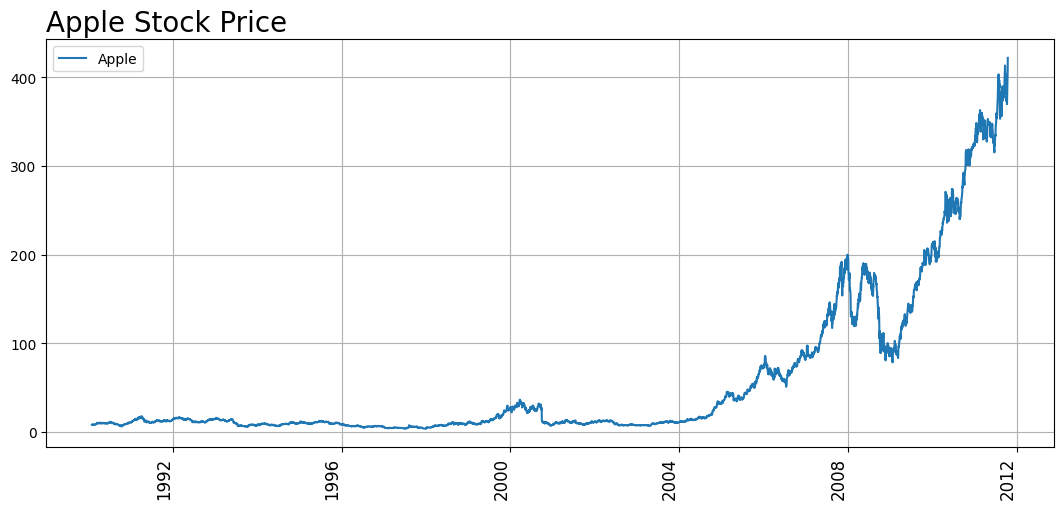

In [114]:
# main plot
close_px.AAPL.plot()
# adding the title
plt.title('Apple Stock Price', fontsize=20, loc='left')
# adding a legend
plt.legend(['Apple'], loc='upper left')
# changing xticks
plt.xticks(fontsize=12, rotation=90)
# adding grid
plt.grid()
plt.show()

Now we should use _.rolling_ method to create a moving window:

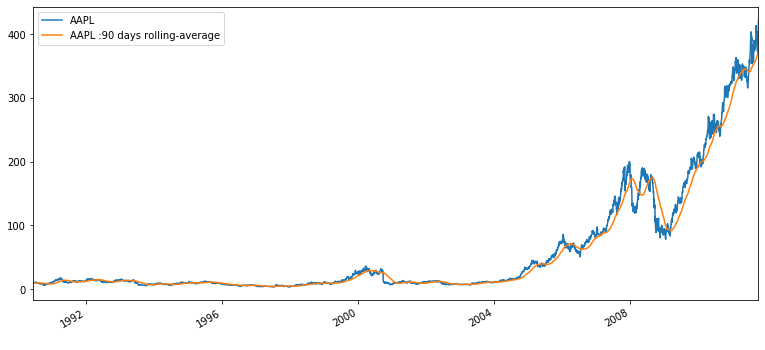

In [283]:
close_px.AAPL.plot(label='AAPL')
close_px.rolling(90)['AAPL'].mean().plot(label='AAPL :90 days rolling-average')
plt.legend()
plt.xlim(close_px.index[90],close_px.index[-1])
plt.show()

What happened in **close_px.rolling(90)['AAPL'].mean().plot(label='AAPL :90 days rolling-average')** ?

- **close_px** --> getting dataframe
- **.rolling(90)['AAPL'].mean()** --> get moving average of _90_ days for _AAPL_ column
- **.plot(label='AAPL :90 days rolling-average')** --> plotting the results

<img src="../Images/wizard.svg"   width="30" align="left">               

**YOUR TURN:**
    
write a function that takes the stock name and rolling period and makes the above plot (pay attention to the plot label!)

In [ ]:
def rolling_plot(stock, period):
    """
    plot a stock price and its rolling average values for the given period
    
    args:
    stock : name of the column (str)
    period : the period we want to the rolling for
    
    returns:
    None
    
    Plots the stock price and its rolling values
    """
    close_px[stock].plot(label=stock)
    close_px.rolling(period)[stock].mean().plot(label=f'{stock} :{period} days rolling-average')
    plt.legend()
    plt.show()

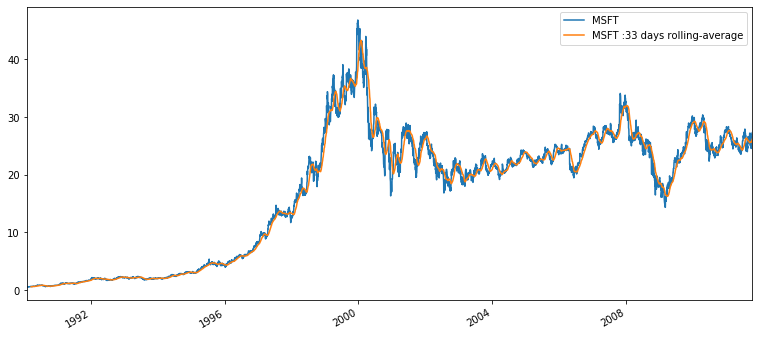

In [284]:
rolling_plot('MSFT', 33)